# Data Understanding

The data for this data science project in researching factors influencing teenage alcoholism was sourced from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/student%2Bperformance#). It was donated to the site by Prof. Paulo Cortez of University Minho. His original work on the dataset, "USING DATA MINING TO PREDICT SECONDARY SCHOOL STUDENT PERFORMANCE, can be found [here](http://www3.dsi.uminho.pt/pcortez/student.pdf)

The data set consists of information on various attributes for each student, taking Portuguese language classes who come from ether of the two higher secondary schools, The Gabriel Pereira School and  the Mousinho da Silveira School. There is information on 649 students on 33 attributes. A list of all the features with description can be found on [Readme](https://github.com/Yeshi341/Student_Alcohol_Consumption/blob/master/Readme.md) section of the Github page to this project. The features have also been described sequentially as [EDA]('EDA.ipynb') was performed on each variable in the EDA notebook.

In [35]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
df = pd.read_csv('preprocessing_file.csv')

In [37]:
pd.set_option("display.max_columns",None)
df.head()

,school,sex,age,address,Pstatus,paid,activities,nursery,internet,romantic,absences,alc,stability,academic_support,idle,grade_avg,delinquency,Medu_1,Medu_2,Medu_3,Medu_4,Fedu_1,Fedu_2,Fedu_3,Fedu_4,Mjob_2,Mjob_3,Mjob_4,Mjob_5,Fjob_2,Fjob_3,Fjob_4,Fjob_5,reason_2,reason_3,reason_4,guardian_2,guardian_3,traveltime_2,traveltime_3,traveltime_4,studytime_2,studytime_3,studytime_4,failures_1,failures_2,failures_3,health_2,health_3,health_4,health_5
0,1,1,18,0,0,0,0,1,0,0,4,0,4,2,12,7.33,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0
1,1,1,17,0,1,0,0,0,1,0,2,0,5,2,9,10.33,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,1,15,0,1,0,0,1,1,0,6,0,0,2,6,12.33,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,1,1,15,0,1,0,1,1,1,1,0,0,3,2,4,14.00,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,1,1,16,0,1,0,0,1,0,0,0,0,4,2,6,12.33,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


### Train Test Split

In [38]:
X = df.drop(columns = ['alc'], axis = 1) 
y = df['alc']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=150, test_size=0.2)

print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape,)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape,)
print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

Training set - Features:  (519, 50) Target:  (519,)
Test set - Features:  (130, 50) Target:  (130,)
0    0.820809
1    0.179191
Name: alc, dtype: float64
0    0.792308
1    0.207692
Name: alc, dtype: float64


### Handling Class Imbalance - with Oversampling minority class

### Upsampling Minority

In [39]:
training  = pd.concat([X_train, y_train], axis=1)

In [40]:
light_drinker = training[training.alc==0]
heavy_drinker = training[training.alc==1]

print('light drinker count: '+ str(len(light_drinker)))
print('heavy drinker count: '+ str(len(heavy_drinker)))

light drinker count: 426
heavy drinker count: 93


In [41]:
from sklearn.utils import resample

In [42]:

heavy_drinker_upsampled = resample(heavy_drinker,
                          replace=True, 
                          n_samples=len(light_drinker), 
                          random_state=23) 
heavy_drinker_upsampled.shape

(426, 51)

In [43]:

upsampled = pd.concat([light_drinker, heavy_drinker_upsampled])
upsampled.alc.value_counts()

0    426
1    426
Name: alc, dtype: int64

In [44]:

y_train_up = upsampled.alc
X_train_up = upsampled.drop(columns = 'alc', axis=1)
print(X_train_up.shape)


(852, 50)


# Feature Selection

### Select Kbest 10

In [45]:

selector = SelectKBest(f_classif, k=10) 
selector.fit(X_train_up, y_train_up)

selected_columns = X_train_up.columns[selector.get_support()]

X_train_kb10 = X_train_up[selected_columns]
X_test_kb10 = X_test[selected_columns]
print(X_train_kb10.shape, X_test_kb10.shape)


(852, 10) (130, 10)


### Select Kbest 15

In [46]:

selector = SelectKBest(f_classif, k=15) 
selector.fit(X_train_up, y_train_up)

selected_columns = X_train_up.columns[selector.get_support()]
removed_columns = X_train_up.columns[~selector.get_support()]

X_train_kb15 = X_train_up[selected_columns]
X_test_kb15 = X_test[selected_columns]

### Select Kbest 20

In [47]:

selector = SelectKBest(f_classif, k=20) 
selector.fit(X_train_up, y_train_up)

selected_columns = X_train_up.columns[selector.get_support()]
removed_columns = X_train_up.columns[~selector.get_support()]

X_train_kb20 = X_train_up[selected_columns]
X_test_kb20 = X_test[selected_columns]

### Select Kbest 25

In [48]:

selector = SelectKBest(f_classif, k=25)
selector.fit(X_train_up, y_train_up)

selected_columns = X_train_up.columns[selector.get_support()]
removed_columns = X_train_up.columns[~selector.get_support()]

X_train_kb25 = X_train_up[selected_columns]
X_test_kb25 = X_test[selected_columns]

### Select Kbest 30

In [49]:

selector = SelectKBest(f_classif, k=30)
selector.fit(X_train_up, y_train_up)

selected_columns = X_train_up.columns[selector.get_support()]
removed_columns = X_train_up.columns[~selector.get_support()]

X_train_kb30 = X_train_up[selected_columns]
X_test_kb30 = X_test[selected_columns]

### Select Kbest 35

In [50]:

selector = SelectKBest(f_classif, k=35) 
selector.fit(X_train_up, y_train_up)

selected_columns = X_train_up.columns[selector.get_support()]
removed_columns = X_train_up.columns[~selector.get_support()]

X_train_kb35 = X_train_up[selected_columns]
X_test_kb35 = X_test[selected_columns]

# Scaling train and test sets

In [51]:
scaler1 = MinMaxScaler()  
scaler1.fit(X_train)

X_train_scaleI = scaler1.transform(X_train)  
X_test_scale = scaler1.transform(X_test)

scaler2 = MinMaxScaler()  
scaler2.fit(X_train_up)

X_train_scaleu = scaler2.transform(X_train_up)

# Models

Our target variable in this project, tells whether a student is a heavy alcohol drinker or not. Our main concern here becomes that we do not want to predict that a student is not a heavy drinker when they actually are. Thus, we are interested in minimizing chances of any False Negatives. Correctly, identifying student has a problem allows us to appropriately allocate help or resources to ameliorate conditions for that student/s to minimize any drinking problem. 

Thus, our focus will be on the recall score or sensitivity score that tells us the proportion of actual positives identified correctly, given by (TP/(TP+FN). The higher this score, the better. 

We also looked at the Accuracy score and the F1 scores as extra metrics to compare model performance on.

# SVM

In [52]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(X_train_up,y_train_up)
p=model1.predict(X_test)
print(confusion_matrix(y_test,p))
print(classification_report(y_test,p))

[[78 25]
 [ 9 18]]
              precision    recall  f1-score   support

           0       0.90      0.76      0.82       103
           1       0.42      0.67      0.51        27

    accuracy                           0.74       130
   macro avg       0.66      0.71      0.67       130
weighted avg       0.80      0.74      0.76       130



In [53]:
param_grid = {'C': [0.1,1,5, 10, 50, 100, 1000], 'gamma': [10,1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=5)

grid.fit(X_train_up,y_train_up)
print(grid.best_params_)
print(grid.best_estimator_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.988 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.497 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.747 total time=   0.1s
[CV 4/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.653 total time=   0.1s
[CV 5/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.606 total time=   0.1s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.988 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.497 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.747 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.653 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.606 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.895 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.988 total time=   0.0s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.994 total time=   0.0s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.877 total time=   0.0s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.895 total time=   0.0s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.859 total time=   0.0s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.935 total time=   0.0s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.894 total time=   0.0s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.825 total time=   0.0s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.807 total time=   0.0s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.753 total time=   0.0s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.729 total time=   0.0s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.782 total time=   0.0s
[CV 1/5] END ....C=10, gamma

[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.836 total time=   0.1s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.794 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.759 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.818 total time=   0.0s
{'C': 1, 'gamma': 10, 'kernel': 'rbf'}
SVC(C=1, gamma=10)


In [54]:
g_p = grid.predict(X_test)
print(confusion_matrix(y_test,g_p ))
print(classification_report(y_test,g_p ))

[[103   0]
 [ 27   0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       103
           1       0.00      0.00      0.00        27

    accuracy                           0.79       130
   macro avg       0.40      0.50      0.44       130
weighted avg       0.63      0.79      0.70       130



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
results= {}
results['1. SVM'] = (round(metrics.accuracy_score(y_test, g_p ),4), 
                             round(metrics.f1_score(y_test, g_p ),4), 
                             round(metrics.recall_score(y_test,g_p ),4))
results

{'1. SVM': (0.7923, 0.0, 0.0)}

# SVM with Kbest10

In [56]:
from sklearn.svm import SVC
m1= SVC()
m1.fit(X_train_kb10,y_train_up)
p=m1.predict(X_test_kb10)
print(confusion_matrix(y_test,p))
print(classification_report(y_test,p))

[[77 26]
 [ 9 18]]
              precision    recall  f1-score   support

           0       0.90      0.75      0.81       103
           1       0.41      0.67      0.51        27

    accuracy                           0.73       130
   macro avg       0.65      0.71      0.66       130
weighted avg       0.79      0.73      0.75       130



In [57]:
param_grid = {'C': [0.1,1,5, 10, 50, 100, 1000], 'gamma': [10,1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=5)

grid.fit(X_train_kb10,y_train_up)
print(grid.best_params_)
print(grid.best_estimator_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.988 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.526 total time=   0.1s
[CV 3/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.747 total time=   0.1s
[CV 4/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.653 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.606 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.982 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.747 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.724 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.606 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.731 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.918 total time=   0.0s
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.929 total time=   0.0s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.825 total time=   0.0s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.848 total time=   0.0s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.800 total time=   0.0s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.800 total time=   0.0s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.829 total time=   0.0s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.778 total time=   0.0s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.795 total time=   0.0s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.753 total time=   0.0s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.718 total time=   0.0s
[CV 5/5] END .....C=10, gamm

[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.754 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.819 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.800 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.753 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.794 total time=   0.0s
{'C': 1, 'gamma': 10, 'kernel': 'rbf'}
SVC(C=1, gamma=10)


In [58]:
grid_predictions = grid.predict(X_test_kb10)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[103   0]
 [ 27   0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       103
           1       0.00      0.00      0.00        27

    accuracy                           0.79       130
   macro avg       0.40      0.50      0.44       130
weighted avg       0.63      0.79      0.70       130



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
results['2. SVM_kb10'] = (round(metrics.accuracy_score(y_test, grid_predictions),4), 
                             round(metrics.f1_score(y_test, grid_predictions),4), 
                             round(metrics.recall_score(y_test,grid_predictions),4))
results

{'1. SVM': (0.7923, 0.0, 0.0), '2. SVM_kb10': (0.7923, 0.0, 0.0)}

# SVM with Kbest15

In [60]:
from sklearn.svm import SVC
m2= SVC()
m2.fit(X_train_kb15,y_train_up)
p=m2.predict(X_test_kb15)
print(confusion_matrix(y_test,p))
print(classification_report(y_test,p))

[[78 25]
 [ 9 18]]
              precision    recall  f1-score   support

           0       0.90      0.76      0.82       103
           1       0.42      0.67      0.51        27

    accuracy                           0.74       130
   macro avg       0.66      0.71      0.67       130
weighted avg       0.80      0.74      0.76       130



In [61]:
param_grid = {'C': [0.1,1,5, 10, 50, 100, 1000], 'gamma': [10,1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=5)

grid.fit(X_train_kb15,y_train_up)
print(grid.best_params_)
print(grid.best_estimator_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.988 total time=   1.1s
[CV 2/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.497 total time=   1.1s
[CV 3/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.747 total time=   1.1s
[CV 4/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.653 total time=   1.1s
[CV 5/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.606 total time=   1.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.988 total time=   1.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   1.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.747 total time=   1.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.724 total time=   1.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.606 total time=   1.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.696 total time=   0.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.895 total time=   0.5s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.912 total time=   0.5s
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.935 total time=   0.5s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.965 total time=   0.5s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.860 total time=   0.5s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.836 total time=   0.5s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.835 total time=   0.5s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.853 total time=   0.5s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.853 total time=   0.5s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.772 total time=   0.6s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.784 total time=   0.6s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.747 total time=   0.6s
[CV 4/5] END .....C=10, gamm

[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.782 total time=   0.6s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.806 total time=   0.6s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.754 total time=   0.6s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.813 total time=   0.5s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.800 total time=   0.5s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.765 total time=   0.5s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.782 total time=   0.6s
{'C': 1, 'gamma': 10, 'kernel': 'rbf'}
SVC(C=1, gamma=10)


In [62]:
grid_predictions = grid.predict(X_test_kb15)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[103   0]
 [ 27   0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       103
           1       0.00      0.00      0.00        27

    accuracy                           0.79       130
   macro avg       0.40      0.50      0.44       130
weighted avg       0.63      0.79      0.70       130



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
results['3. SVM_kb15'] = (round(metrics.accuracy_score(y_test, p),4), 
                             round(metrics.f1_score(y_test, p),4), 
                             round(metrics.recall_score(y_test,p),4))
results

{'1. SVM': (0.7923, 0.0, 0.0),
 '2. SVM_kb10': (0.7923, 0.0, 0.0),
 '3. SVM_kb15': (0.7385, 0.5143, 0.6667)}

# SVM with Kbest20

In [64]:
from sklearn.svm import SVC
m3= SVC()
m3.fit(X_train_kb20,y_train_up)
p=m3.predict(X_test_kb20)
print(confusion_matrix(y_test,p))
print(classification_report(y_test,p))

[[79 24]
 [ 9 18]]
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       103
           1       0.43      0.67      0.52        27

    accuracy                           0.75       130
   macro avg       0.66      0.72      0.67       130
weighted avg       0.80      0.75      0.76       130



In [65]:
param_grid = {'C': [0.1,1,5, 10, 50, 100, 1000], 'gamma': [10,1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=5)

grid.fit(X_train_kb20,y_train_up)
print(grid.best_params_)
print(grid.best_estimator_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.988 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.497 total time=   0.1s
[CV 3/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.747 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.653 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.606 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.988 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.747 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.653 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.606 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.708 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.941 total time=   0.0s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.971 total time=   0.0s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.842 total time=   0.0s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.848 total time=   0.0s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.835 total time=   0.0s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.871 total time=   0.0s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.853 total time=   0.0s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.778 total time=   0.0s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.836 total time=   0.0s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.741 total time=   0.0s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.706 total time=   0.0s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.776 total time=   0.0s
[CV 1/5] END ....C=10, gamma

[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.737 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.830 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.806 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.753 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.788 total time=   0.0s
{'C': 1, 'gamma': 10, 'kernel': 'rbf'}
SVC(C=1, gamma=10)


In [66]:
grid_predictions = grid.predict(X_test_kb20)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[103   0]
 [ 27   0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       103
           1       0.00      0.00      0.00        27

    accuracy                           0.79       130
   macro avg       0.40      0.50      0.44       130
weighted avg       0.63      0.79      0.70       130



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
results['4. SVM_kb20'] = (round(metrics.accuracy_score(y_test, grid_predictions),4), 
                             round(metrics.f1_score(y_test, grid_predictions),4), 
                             round(metrics.recall_score(y_test,grid_predictions),4))
results

{'1. SVM': (0.7923, 0.0, 0.0),
 '2. SVM_kb10': (0.7923, 0.0, 0.0),
 '3. SVM_kb15': (0.7385, 0.5143, 0.6667),
 '4. SVM_kb20': (0.7923, 0.0, 0.0)}

# SVM with Kbest25

In [68]:
from sklearn.svm import SVC
m4= SVC()
m4.fit(X_train_kb25,y_train_up)
p=m4.predict(X_test_kb25)
print(confusion_matrix(y_test,p))
print(classification_report(y_test,p))

[[80 23]
 [ 9 18]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.83       103
           1       0.44      0.67      0.53        27

    accuracy                           0.75       130
   macro avg       0.67      0.72      0.68       130
weighted avg       0.80      0.75      0.77       130



In [69]:
param_grid = {'C': [0.1,1,5, 10, 50, 100, 1000], 'gamma': [10,1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=5)

grid.fit(X_train_kb25,y_train_up)
print(grid.best_params_)
print(grid.best_estimator_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.988 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.497 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.747 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.653 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.606 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.988 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.747 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.653 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.606 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.713 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.941 total time=   0.0s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.971 total time=   0.0s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.836 total time=   0.0s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.848 total time=   0.0s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.847 total time=   0.0s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.894 total time=   0.0s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.859 total time=   0.0s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.772 total time=   0.0s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.836 total time=   0.0s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.747 total time=   0.0s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.700 total time=   0.0s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.765 total time=   0.0s
[CV 1/5] END ....C=10, gamma

[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.800 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.765 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.806 total time=   0.0s
{'C': 1, 'gamma': 10, 'kernel': 'rbf'}
SVC(C=1, gamma=10)


In [70]:
grid_predictions = grid.predict(X_test_kb25)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[103   0]
 [ 27   0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       103
           1       0.00      0.00      0.00        27

    accuracy                           0.79       130
   macro avg       0.40      0.50      0.44       130
weighted avg       0.63      0.79      0.70       130



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
results['5. SVM_kb25'] = (round(metrics.accuracy_score(y_test, grid_predictions),4), 
                             round(metrics.f1_score(y_test, grid_predictions),4), 
                             round(metrics.recall_score(y_test,grid_predictions),4))
results

{'1. SVM': (0.7923, 0.0, 0.0),
 '2. SVM_kb10': (0.7923, 0.0, 0.0),
 '3. SVM_kb15': (0.7385, 0.5143, 0.6667),
 '4. SVM_kb20': (0.7923, 0.0, 0.0),
 '5. SVM_kb25': (0.7923, 0.0, 0.0)}

# SVM with Kbest30

In [72]:
from sklearn.svm import SVC
m5= SVC()
m5.fit(X_train_kb30,y_train_up)
p=m5.predict(X_test_kb30)
print(confusion_matrix(y_test,p))
print(classification_report(y_test,p))

[[77 26]
 [ 9 18]]
              precision    recall  f1-score   support

           0       0.90      0.75      0.81       103
           1       0.41      0.67      0.51        27

    accuracy                           0.73       130
   macro avg       0.65      0.71      0.66       130
weighted avg       0.79      0.73      0.75       130



In [73]:
param_grid = {'C': [0.1,1,5, 10, 50, 100, 1000], 'gamma': [10,1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=5)

grid.fit(X_train_kb30,y_train_up)
print(grid.best_params_)
print(grid.best_estimator_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.988 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.497 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.747 total time=   0.1s
[CV 4/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.653 total time=   0.1s
[CV 5/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.606 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.988 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.747 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.653 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.606 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.731 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.935 total time=   0.0s
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.959 total time=   0.0s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.976 total time=   0.0s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.830 total time=   0.0s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.848 total time=   0.0s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.818 total time=   0.0s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.894 total time=   0.0s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.859 total time=   0.0s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.772 total time=   0.0s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.825 total time=   0.0s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.747 total time=   0.0s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.724 total time=   0.0s
[CV 5/5] END .....C=10, gamm

[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.818 total time=   0.1s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.749 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.830 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.788 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.724 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.776 total time=   0.0s
{'C': 1, 'gamma': 10, 'kernel': 'rbf'}
SVC(C=1, gamma=10)


In [74]:
grid_predictions = grid.predict(X_test_kb30)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[103   0]
 [ 27   0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       103
           1       0.00      0.00      0.00        27

    accuracy                           0.79       130
   macro avg       0.40      0.50      0.44       130
weighted avg       0.63      0.79      0.70       130



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
results['6. SVM_kb30'] = (round(metrics.accuracy_score(y_test, grid_predictions),4), 
                             round(metrics.f1_score(y_test, grid_predictions),4), 
                             round(metrics.recall_score(y_test,grid_predictions),4))
results

{'1. SVM': (0.7923, 0.0, 0.0),
 '2. SVM_kb10': (0.7923, 0.0, 0.0),
 '3. SVM_kb15': (0.7385, 0.5143, 0.6667),
 '4. SVM_kb20': (0.7923, 0.0, 0.0),
 '5. SVM_kb25': (0.7923, 0.0, 0.0),
 '6. SVM_kb30': (0.7923, 0.0, 0.0)}

# SVM with Kbest35

In [76]:
from sklearn.svm import SVC
m6= SVC()
m6.fit(X_train_kb35,y_train_up)
p=m6.predict(X_test_kb35)
print(confusion_matrix(y_test,p))
print(classification_report(y_test,p))

[[77 26]
 [ 9 18]]
              precision    recall  f1-score   support

           0       0.90      0.75      0.81       103
           1       0.41      0.67      0.51        27

    accuracy                           0.73       130
   macro avg       0.65      0.71      0.66       130
weighted avg       0.79      0.73      0.75       130



In [77]:
param_grid = {'C': [0.1,1,5, 10, 50, 100, 1000], 'gamma': [10,1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=5)

grid.fit(X_train_kb35,y_train_up)
print(grid.best_params_)
print(grid.best_estimator_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.988 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.497 total time=   0.1s
[CV 3/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.747 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.653 total time=   0.1s
[CV 5/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.606 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.988 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.497 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.747 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.653 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.606 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.760 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.924 total time=   0.0s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.941 total time=   0.0s
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.971 total time=   0.0s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.976 total time=   0.0s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.854 total time=   0.0s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.848 total time=   0.0s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.859 total time=   0.0s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.882 total time=   0.0s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.882 total time=   0.0s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.772 total time=   0.0s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.819 total time=   0.0s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.724 total time=   0.0s
[CV 4/5] END .....C=10, gamm

[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.835 total time=   0.1s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.760 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.825 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.765 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.729 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.794 total time=   0.0s
{'C': 1, 'gamma': 10, 'kernel': 'rbf'}
SVC(C=1, gamma=10)


In [78]:
grid_predictions = grid.predict(X_test_kb35)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[103   0]
 [ 27   0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       103
           1       0.00      0.00      0.00        27

    accuracy                           0.79       130
   macro avg       0.40      0.50      0.44       130
weighted avg       0.63      0.79      0.70       130



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
results['7. SVM_kb35'] = (round(metrics.accuracy_score(y_test, grid_predictions),4), 
                             round(metrics.f1_score(y_test, grid_predictions),4), 
                             round(metrics.recall_score(y_test,grid_predictions),4))
results

{'1. SVM': (0.7923, 0.0, 0.0),
 '2. SVM_kb10': (0.7923, 0.0, 0.0),
 '3. SVM_kb15': (0.7385, 0.5143, 0.6667),
 '4. SVM_kb20': (0.7923, 0.0, 0.0),
 '5. SVM_kb25': (0.7923, 0.0, 0.0),
 '6. SVM_kb30': (0.7923, 0.0, 0.0),
 '7. SVM_kb35': (0.7923, 0.0, 0.0)}

# Final Model

# SVM with Kbest10

In [85]:
from sklearn.svm import SVC
m1= SVC()
m1.fit(X_train_kb10,y_train_up)
p=m1.predict(X_test_kb10)
print(confusion_matrix(y_test,p))
print(classification_report(y_test,p))

[[77 26]
 [ 9 18]]
              precision    recall  f1-score   support

           0       0.90      0.75      0.81       103
           1       0.41      0.67      0.51        27

    accuracy                           0.73       130
   macro avg       0.65      0.71      0.66       130
weighted avg       0.79      0.73      0.75       130



In [86]:
param_grid = {'C': [0.1,1,5, 10, 50, 100, 1000], 'gamma': [10,1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=5)

grid.fit(X_train_kb10,y_train_up)
print(grid.best_params_)
print(grid.best_estimator_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.988 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.526 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.747 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.653 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.606 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.982 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.747 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.724 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.606 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.731 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.825 total time=   0.0s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.848 total time=   0.0s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.800 total time=   0.0s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.800 total time=   0.0s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.829 total time=   0.0s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.778 total time=   0.0s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.795 total time=   0.0s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.753 total time=   0.0s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.718 total time=   0.0s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.747 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.737 total time=   0.0s
[CV 2/5] END ....C=10, gamma

[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.753 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.794 total time=   0.0s
{'C': 1, 'gamma': 10, 'kernel': 'rbf'}
SVC(C=1, gamma=10)


In [82]:
param_grid = {'C': [0.1,1,5, 10, 50, 100, 1000], 'gamma': [10,1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=5)

grid.fit(X_train_kb25,y_train_up)
print(grid.best_params_)
print(grid.best_estimator_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.988 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.497 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.747 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.653 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.606 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.988 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.747 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.653 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.606 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.713 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.929 total time=   0.0s
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.941 total time=   0.0s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.971 total time=   0.0s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.836 total time=   0.0s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.848 total time=   0.0s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.847 total time=   0.0s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.894 total time=   0.0s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.859 total time=   0.0s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.772 total time=   0.0s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.836 total time=   0.0s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.747 total time=   0.0s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.700 total time=   0.0s
[CV 5/5] END .....C=10, gamm

[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.847 total time=   0.1s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.737 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.825 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.800 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.765 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.806 total time=   0.0s
{'C': 1, 'gamma': 10, 'kernel': 'rbf'}
SVC(C=1, gamma=10)


In [87]:
grid_predictions = grid.predict(X_test_kb10)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[103   0]
 [ 27   0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       103
           1       0.00      0.00      0.00        27

    accuracy                           0.79       130
   macro avg       0.40      0.50      0.44       130
weighted avg       0.63      0.79      0.70       130



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


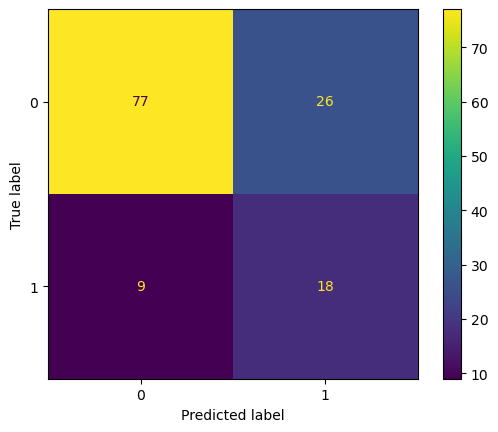

In [88]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

c = confusion_matrix(y_test, p)
c1= ConfusionMatrixDisplay(c)
c1.plot()
